In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

from skimage.metrics import structural_similarity as ssim

2025-04-18 16:18:41.659718: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744993121.937215      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744993122.016381      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train = x_train.astype("float32")/255.0
x_test = x_test.astype("float32")/255.0

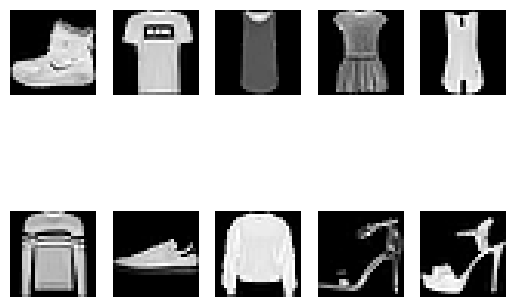

In [4]:
plt.figure()
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap = "gray")
    plt.axis("off")
plt.show()

In [5]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [6]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

In [7]:
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [8]:
input_dim = x_train.shape[1]
encoding_dim = 64

In [9]:
input_dim

784

In [11]:
input_image = Input(shape = (input_dim,))
encoded = Dense(256, activation = "relu")(input_image)
encoded = Dense(128, activation = "relu")(encoded)
encoded = Dense(encoding_dim, activation = "relu")(encoded)

In [12]:
decoded = Dense(128, activation = "relu")(encoded)
decoded = Dense(256, activation = "relu")(decoded)
decoded = Dense(input_dim, activation = "sigmoid")(decoded)

In [13]:
autoencoder = Model(input_image, decoded)
autoencoder.compile(optimizer = Adam(), loss = "binary_crossentropy")

In [16]:
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 784)                 │         201,488 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 484,944 (1.85 MB)

 Trainable params: 484,944 (1.85 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
history = autoencoder.fit(x_train, x_train, epochs = 100,
                          batch_size = 64, shuffle = True,
                          validation_data = (x_test, x_test),
                          verbose = 1)

Epoch 1/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 0.3595 - val_loss: 0.2935
Epoch 2/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.2893 - val_loss: 0.2850
Epoch 3/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.2822 - val_loss: 0.2809
Epoch 4/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.2776 - val_loss: 0.2785
Epoch 5/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.2754 - val_loss: 0.2760
Epoch 6/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.2732 - val_loss: 0.2762
Epoch 7/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.2720 - val_loss: 0.2740
Epoch 8/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.2712 - val_loss: 0.2732
Epoch 9/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.2700 - val_loss: 0.2719
Epoch 10/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.2701 - val_loss: 0.2712
Epoch 11/100
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.2683 - val_loss: 0.2705
Epoch 12/100
938/938 ━━━━━━━━━━━━━━━━━━━

In [18]:
encoder = Model(input_image, encoded)

In [19]:
encoded_input = Input(shape = (encoding_dim,))
decoder_layer1 = autoencoder.layers[-3](encoded_input)
decoder_layer2 = autoencoder.layers[-2](decoder_layer1)
decoder_output = autoencoder.layers[-1](decoder_layer2)

decoder = Model(encoded_input, decoder_output)

In [21]:
encoded_images = encoder.predict(x_test)
decoded_images = decoder.predict(encoded_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


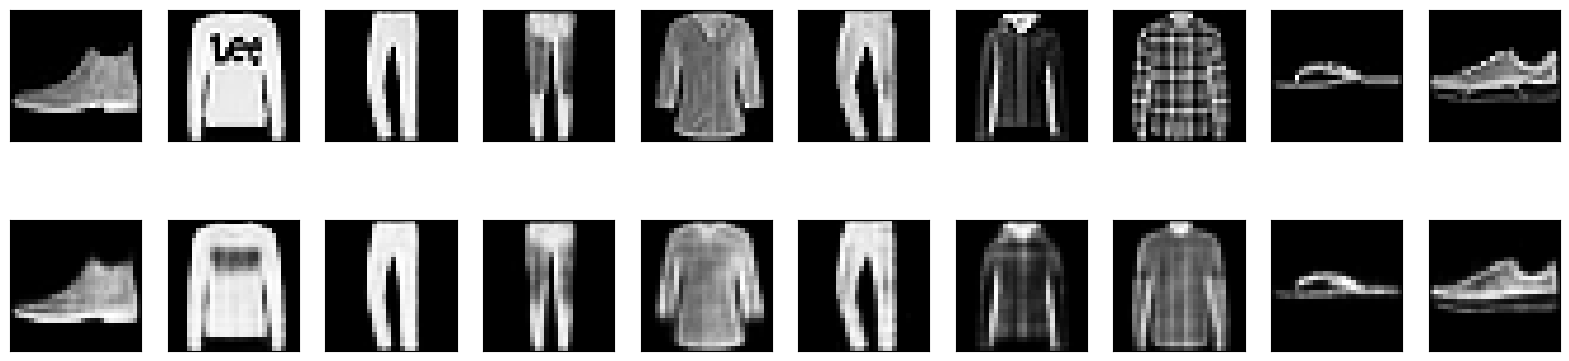

In [24]:
n = 10
plt.figure(figsize=(20, 5))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap = "gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_images[i].reshape(28, 28), cmap = "gray")
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

In [28]:
def compute_ssim(original, reconstructed):
    original = original.reshape(28, 28)
    reconstructed = reconstructed.reshape(28, 28)
    return ssim(original, reconstructed, data_range=1)


ssim_score = []

In [29]:
for i in range(100):
    original_img = x_test[i]
    reconstructed_img = decoded_images[i]
    score = compute_ssim(original_img, reconstructed_img)
    ssim_score.append(score)

In [30]:
average_ssim = np.mean(ssim_score)
print("SSIM: ", average_ssim)

SSIM:  0.8420866584862046
